# <U>**Taller NLP**</U>
## **Data Science III: NLP & Deep Learning aplicado a Ciencia de Datos - Coderhouse**
### **_Alumna:_** Ana Paula Alvarez Pringles
### **_Comisión:_** 60960
### **_Porfesor:_**  Ignacio Russo Locati
### **_Tutor:_**  Mariano Rodas



## Resumen
Esta dataset fue descargado desde Kaggle y se corresponde con el paper de Malo et al. 2014.

El dataset contiene frases y fragmentos de noticias del ámbito financiero (columna 'text') y la polaridad de la misma desde la perspectiva del inversor pudiendo ser esta positiva, negativa o neutral (columna 'sentiment').



Malo, P., Sinha, A., Korhonen, P., Wallenius, J., & Takala, P. (2014). Good debt or bad debt: Detecting semantic orientations in economic texts. Journal of the Association for Information Science and Technology, 65(4), 782-796.

## Carga de dependencias

In [ ]:
from google.colab import files
import io
import pandas as pd

import nltk
nltk.download('punkt')
nltk.download('stopwords')
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data Acquisition y exploración

El data set fue obtenido desde el sitio https://www.kaggle.com


In [ ]:
dataset = files.upload()

Saving financial.csv to financial.csv


In [ ]:
df = pd.read_csv(io.BytesIO(dataset["financial.csv"]),encoding='latin1',names=['sentiment', 'text'], header=0)
df.head()

,sentiment,text
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [ ]:
df.shape

(4845, 2)

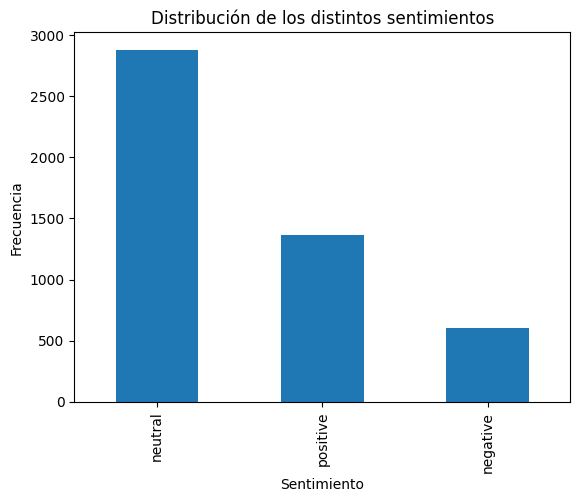

In [ ]:
# Conteo por tipo de sentimiento
import matplotlib.pyplot as plt

# Assuming 'df' is your dataframe
df['sentiment'].value_counts().plot(kind='bar')
plt.title('Distribución de los distintos sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
df['sentiment'].value_counts(normalize=True) * 100

,proportion
sentiment,
neutral,59.401445
positive,28.132095
negative,12.466460


De los 4845 frases el 59% (casi 2900) se consideran neutrales, el 28% positivas y tan solo el 12% (600 frases) negativas.

## Text Preprocessing

In [ ]:
# Llevar todo el documento a minúscula

df["text_lower"] = df["text"].str.lower()
df.head()

,sentiment,text,text_lower
0,neutral,Technopolis plans to develop in stages an area...,technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...,the international electronic industry company ...
2,positive,With the new production plant the company woul...,with the new production plant the company woul...
3,positive,According to the company 's updated strategy f...,according to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,financing of aspocomp 's growth aspocomp is ag...


In [ ]:
#Remover caracteres especiales y números

df['text_clean'] = df['text_lower'].str.replace(r'[^a-záéíóúñü\s]', '', regex=True)
df.head()

,sentiment,text,text_lower,text_clean
0,neutral,Technopolis plans to develop in stages an area...,technopolis plans to develop in stages an area...,technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...,the international electronic industry company ...,the international electronic industry company ...
2,positive,With the new production plant the company woul...,with the new production plant the company woul...,with the new production plant the company woul...
3,positive,According to the company 's updated strategy f...,according to the company 's updated strategy f...,according to the company s updated strategy fo...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,financing of aspocomp 's growth aspocomp is ag...,financing of aspocomp s growth aspocomp is agg...


In [ ]:
#Tokenización y eliminación de stopwords

df['tokens'] = df['text_clean'].apply(word_tokenize)
stop_words = set(stopwords.words('english'))
df['tokens_sin_stopwords'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])
df[['tokens', 'tokens_sin_stopwords']].head()

,tokens,tokens_sin_stopwords
0,"[technopolis, plans, to, develop, in, stages, ...","[technopolis, plans, develop, stages, area, le..."
1,"[the, international, electronic, industry, com...","[international, electronic, industry, company,..."
2,"[with, the, new, production, plant, the, compa...","[new, production, plant, company, would, incre..."
3,"[according, to, the, company, s, updated, stra...","[according, company, updated, strategy, years,..."
4,"[financing, of, aspocomp, s, growth, aspocomp,...","[financing, aspocomp, growth, aspocomp, aggres..."


In [ ]:
#Lematización

nlp = spacy.load("en_core_web_sm")

def lemmatize_text(text):
    doc = nlp(' '.join(text))
    return [token.lemma_ for token in doc]

df['lemmas'] = df['tokens_sin_stopwords'].apply(lemmatize_text)

df[['tokens_sin_stopwords', 'lemmas']].head()


,tokens_sin_stopwords,lemmas
0,"[technopolis, plans, develop, stages, area, le...","[technopoli, plan, develop, stage, area, less,..."
1,"[international, electronic, industry, company,...","[international, electronic, industry, company,..."
2,"[new, production, plant, company, would, incre...","[new, production, plant, company, would, incre..."
3,"[according, company, updated, strategy, years,...","[accord, company, update, strategy, year, basw..."
4,"[financing, aspocomp, growth, aspocomp, aggres...","[finance, aspocomp, growth, aspocomp, aggressi..."


In [ ]:
df.head(15)

,sentiment,text,text_lower,text_clean,tokens,tokens_sin_stopwords,lemmas
0,neutral,Technopolis plans to develop in stages an area...,technopolis plans to develop in stages an area...,technopolis plans to develop in stages an area...,"[technopolis, plans, to, develop, in, stages, ...","[technopolis, plans, develop, stages, area, le...","[technopoli, plan, develop, stage, area, less,..."
1,negative,The international electronic industry company ...,the international electronic industry company ...,the international electronic industry company ...,"[the, international, electronic, industry, com...","[international, electronic, industry, company,...","[international, electronic, industry, company,..."
2,positive,With the new production plant the company woul...,with the new production plant the company woul...,with the new production plant the company woul...,"[with, the, new, production, plant, the, compa...","[new, production, plant, company, would, incre...","[new, production, plant, company, would, incre..."
3,positive,According to the company 's updated strategy f...,according to the company 's updated strategy f...,according to the company s updated strategy fo...,"[according, to, the, company, s, updated, stra...","[according, company, updated, strategy, years,...","[accord, company, update, strategy, year, basw..."
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,financing of aspocomp 's growth aspocomp is ag...,financing of aspocomp s growth aspocomp is agg...,"[financing, of, aspocomp, s, growth, aspocomp,...","[financing, aspocomp, growth, aspocomp, aggres...","[finance, aspocomp, growth, aspocomp, aggressi..."
5,positive,"For the last quarter of 2010 , Componenta 's n...","for the last quarter of 2010 , componenta 's n...",for the last quarter of componenta s net sal...,"[for, the, last, quarter, of, componenta, s, n...","[last, quarter, componenta, net, sales, double...","[last, quarter, componenta, net, sale, double,..."
6,positive,"In the third quarter of 2010 , net sales incre...","in the third quarter of 2010 , net sales incre...",in the third quarter of net sales increased ...,"[in, the, third, quarter, of, net, sales, incr...","[third, quarter, net, sales, increased, eur, m...","[third, quarter, net, sale, increase, eur, mn,..."
7,positive,Operating profit rose to EUR 13.1 mn from EUR ...,operating profit rose to eur 13.1 mn from eur ...,operating profit rose to eur mn from eur mn ...,"[operating, profit, rose, to, eur, mn, from, e...","[operating, profit, rose, eur, mn, eur, mn, co...","[operating, profit, rise, eur, mn, eur, mn, co..."
8,positive,"Operating profit totalled EUR 21.1 mn , up fro...","operating profit totalled eur 21.1 mn , up fro...",operating profit totalled eur mn up from eur...,"[operating, profit, totalled, eur, mn, up, fro...","[operating, profit, totalled, eur, mn, eur, mn...","[operate, profit, total, eur, mn, eur, mn, rep..."
9,positive,TeliaSonera TLSN said the offer is in line wit...,teliasonera tlsn said the offer is in line wit...,teliasonera tlsn said the offer is in line wit...,"[teliasonera, tlsn, said, the, offer, is, in, ...","[teliasonera, tlsn, said, offer, line, strateg...","[teliasonera, tlsn, say, offer, line, strategy..."


In [ ]:
#Stemming

stemmer = SnowballStemmer('english')
df['stems'] = df['tokens_sin_stopwords'].apply(lambda x: [stemmer.stem(word) for word in x])

df[['tokens_sin_stopwords', 'stems']].head()

,tokens_sin_stopwords,stems
0,"[technopolis, plans, develop, stages, area, le...","[technopoli, plan, develop, stage, area, less,..."
1,"[international, electronic, industry, company,...","[intern, electron, industri, compani, elcoteq,..."
2,"[new, production, plant, company, would, incre...","[new, product, plant, compani, would, increas,..."
3,"[according, company, updated, strategy, years,...","[accord, compani, updat, strategi, year, baswa..."
4,"[financing, aspocomp, growth, aspocomp, aggres...","[financ, aspocomp, growth, aspocomp, aggress, ..."


In [ ]:
# TF-IDF
# Unimos las palabras lematizadas en un solo string para cada reseña
df['lemmas_str'] = df['lemmas'].apply(lambda x: ' '.join(x))

tfidf_vectorizer = TfidfVectorizer(max_features=100, stop_words=stopwords.words('english'))
tfidf_matrix = tfidf_vectorizer.fit_transform(df['lemmas_str'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

tfidf_df.head()

,accord,agreement,also,area,bank,base,board,build,business,capital,...,today,total,two,unit,usd,use,value,well,would,year
0,0.000000,0.0,0.0,0.431149,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
2,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.225603,0.0,0.0,0.483279,0.000000
3,0.363817,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.288353
4,0.000000,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000


In [ ]:
#Counter / Word Frecuency